In [2]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt 
import seaborn as sns # data visualizationsns.set_style('whitegrid') # set style for visualization
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',111)
from tools import *

warnings.filterwarnings('ignore')

In [3]:
df =pd.read_excel("insurance_compagies_4.xlsx")

comfort_liste=['Online Presence','Use of Technology','Digital Engagement Score','Fraud Detection Rate','Fraud Detection Efficiency']
df=df[comfort_liste]
df.head()

,Online Presence,Use of Technology,Digital Engagement Score,Fraud Detection Rate,Fraud Detection Efficiency
0,53.46,Moderate,55.93,57.94,57.041930
1,71.94,Low,73.44,26.54,22.888096
2,54.23,Moderate,55.74,86.67,81.877149
3,57.06,High,58.18,83.15,80.788540
4,78.91,High,80.15,96.90,90.494910


In [4]:
Technology_mapping = {'Low': 0,
                'Moderate': 1,           
                'High': 2
                }

df['Use of Technology']=df['Use of Technology'].map(Technology_mapping)

*******************
VIF Score lower than  18
   VIF Factor           features
1    2.266504  Use of Technology
*******************
VIF Score higher than  18
    VIF Factor                    features
0  1455.803575             Online Presence
2  1524.255201    Digital Engagement Score
3   244.022635        Fraud Detection Rate
4   240.848399  Fraud Detection Efficiency


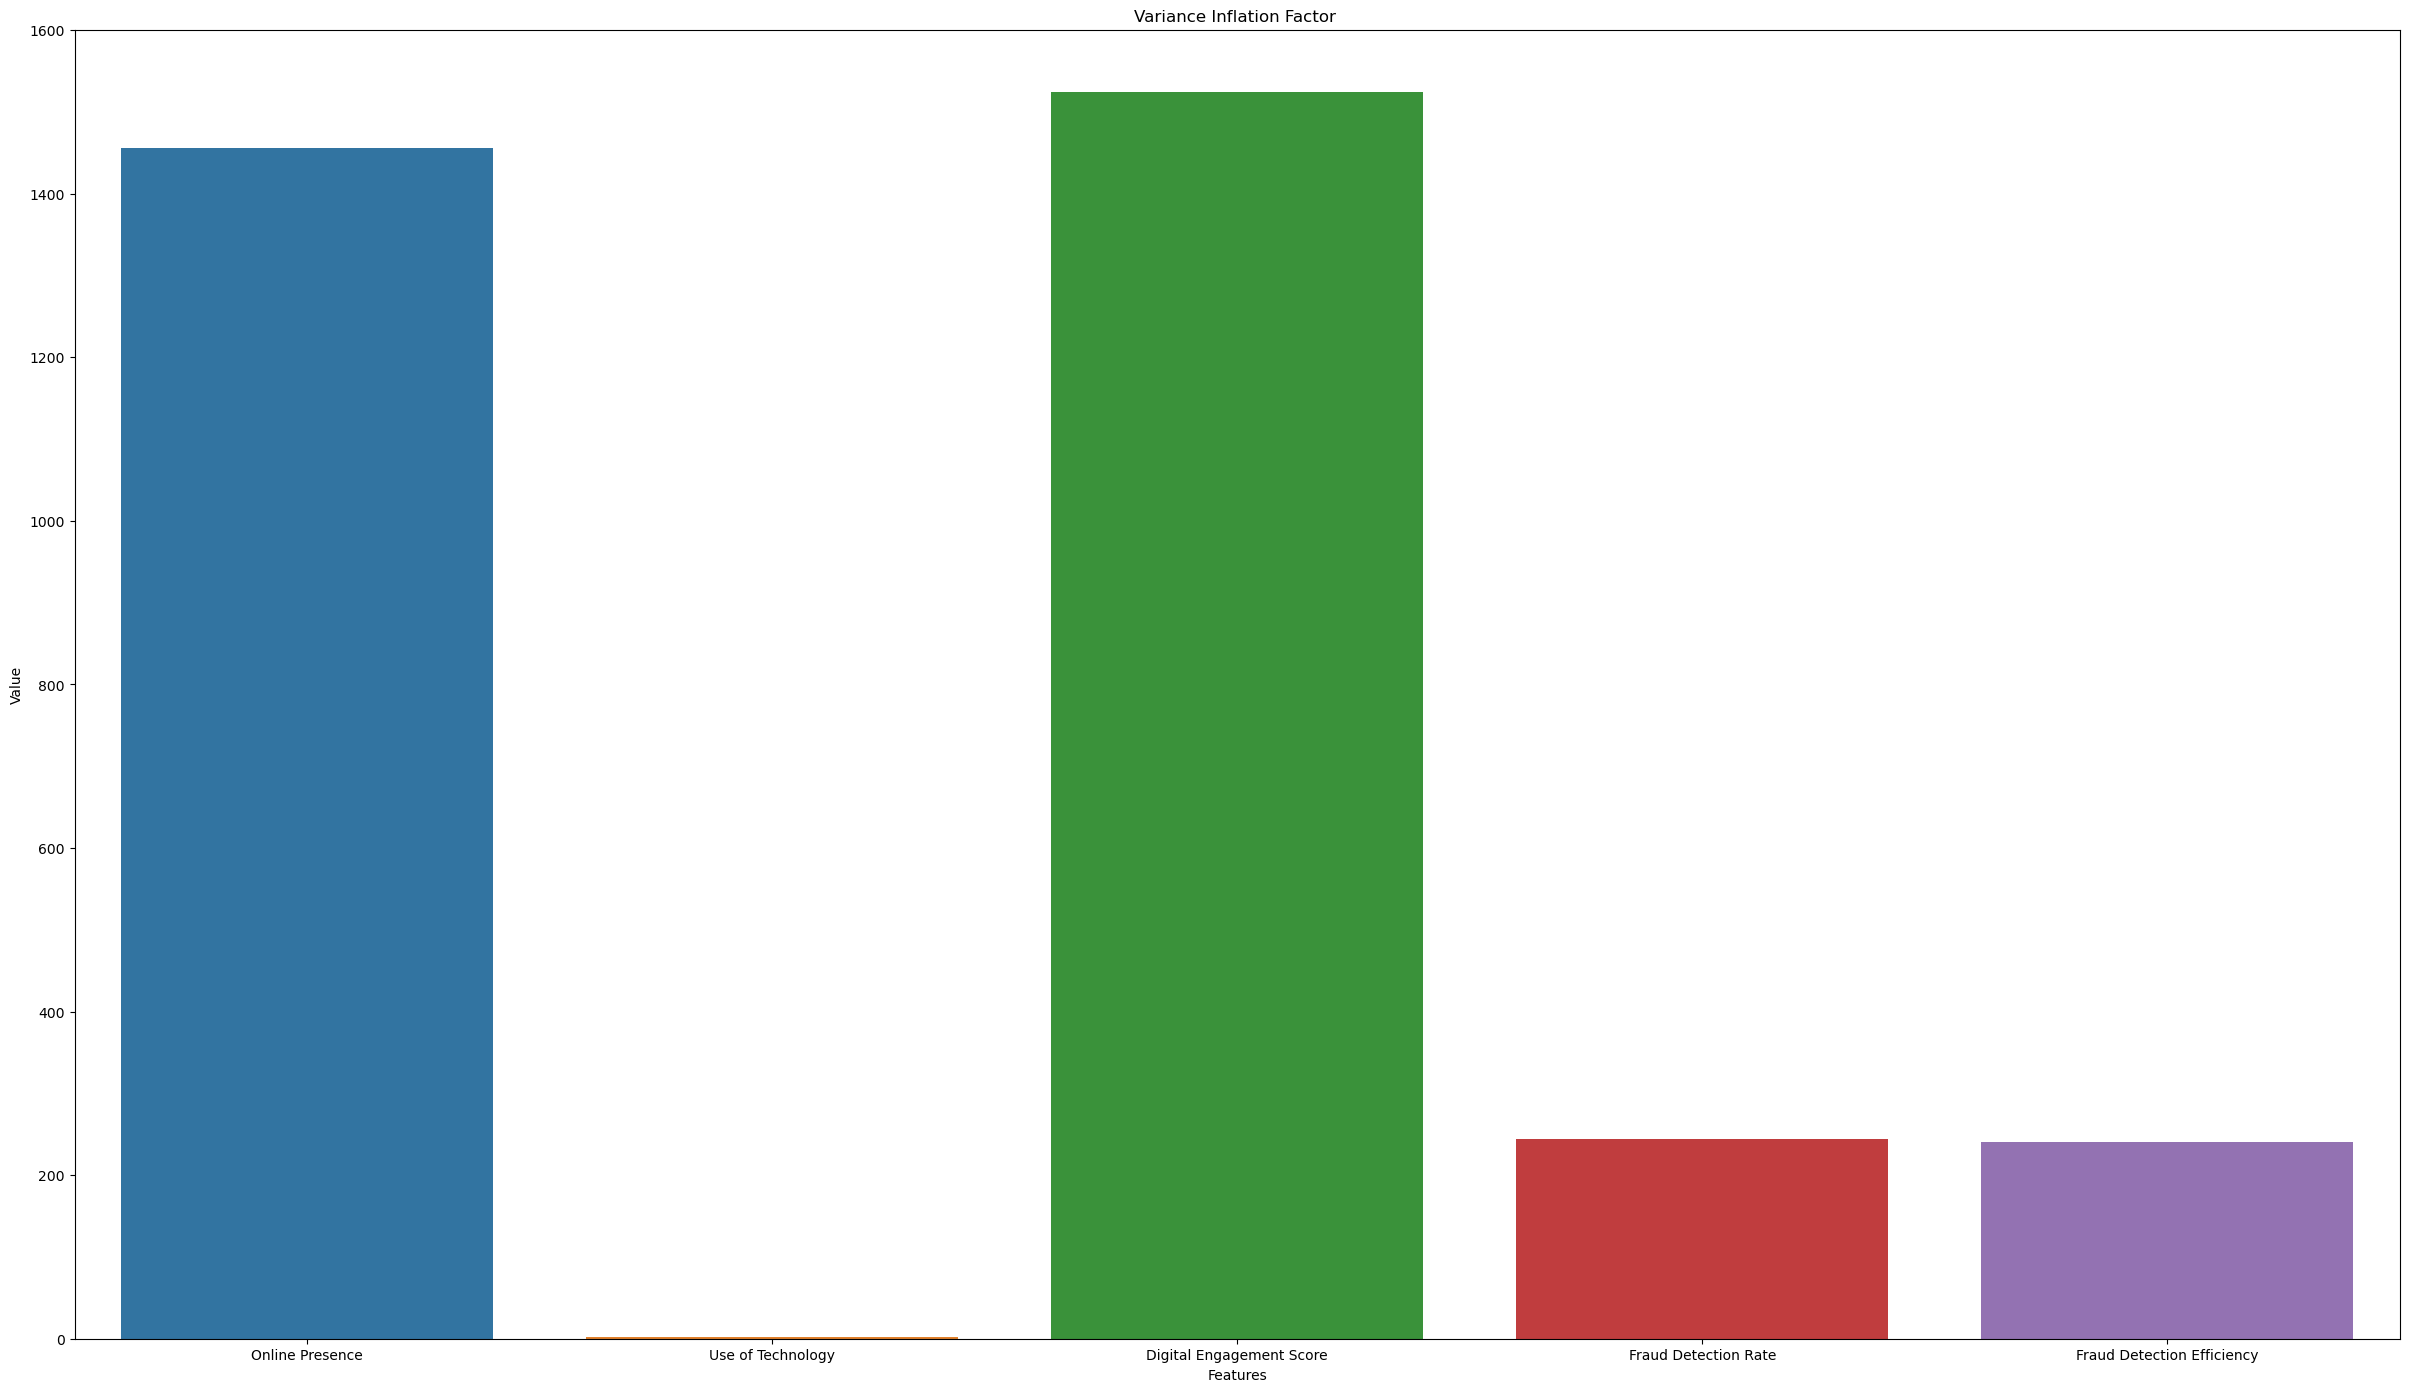

In [5]:
df1=VIF_features_selection(df,18)

In [6]:
df1=df[['Digital Engagement Score','Use of Technology','Fraud Detection Efficiency']]
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

## "Clustering Criteria for Insurance Agencies"
    
   "Clustering Criteria for Insurance Agencies" outlines a set of parameters designed to group insurance agencies based on key performance indicators. These criteria aim to facilitate the development of a recommendation system by categorizing agencies .




## Feature : Comfort Quality

#### High Digital Engagement Score: 

   * We aim to leverage digital channels effectively to enhance customer engagement and interaction with our insurance services. A high Digital Engagement Score signifies active and meaningful engagement with customers through online platforms, portals, and digital communication channels.

#### High Use of Technology:

   * We seek to embrace technological advancements and innovations to streamline our operations and enhance the overall customer experience. A high Use of Technology score indicates extensive adoption and utilization of modern technologies, such as AI, machine learning, automation, and digital tools, across various aspects of our insurance processes.

#### High Fraud Detection Efficiency:

   * Ensuring the security and integrity of our insurance operations is paramount. We prioritize robust fraud detection measures to safeguard against fraudulent activities and protect the interests of our customers and stakeholders. A high Fraud Detection Efficiency score indicates effective detection and prevention of fraudulent claims and activities, thereby minimizing risks and losses for our agency.

updated
Cluster : 2  in process....
Cluster : 3  in process....
Cluster : 4  in process....
Cluster : 5  in process....
Cluster : 6  in process....
Cluster : 7  in process....
Cluster : 8  in process....
Cluster : 9  in process....


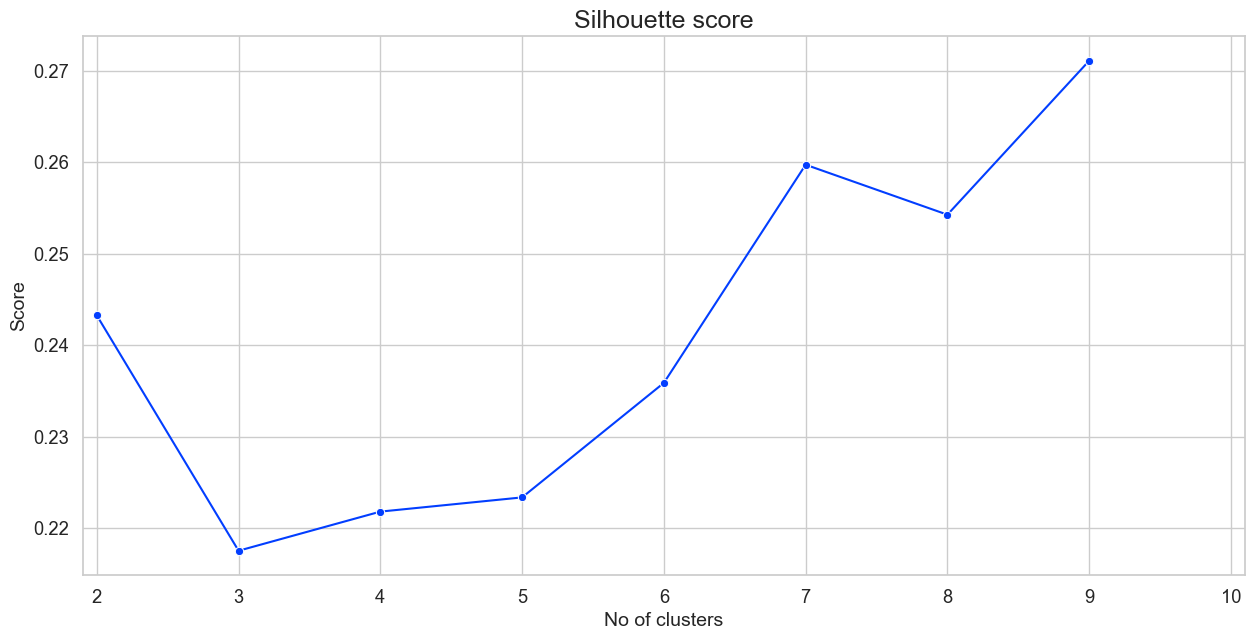

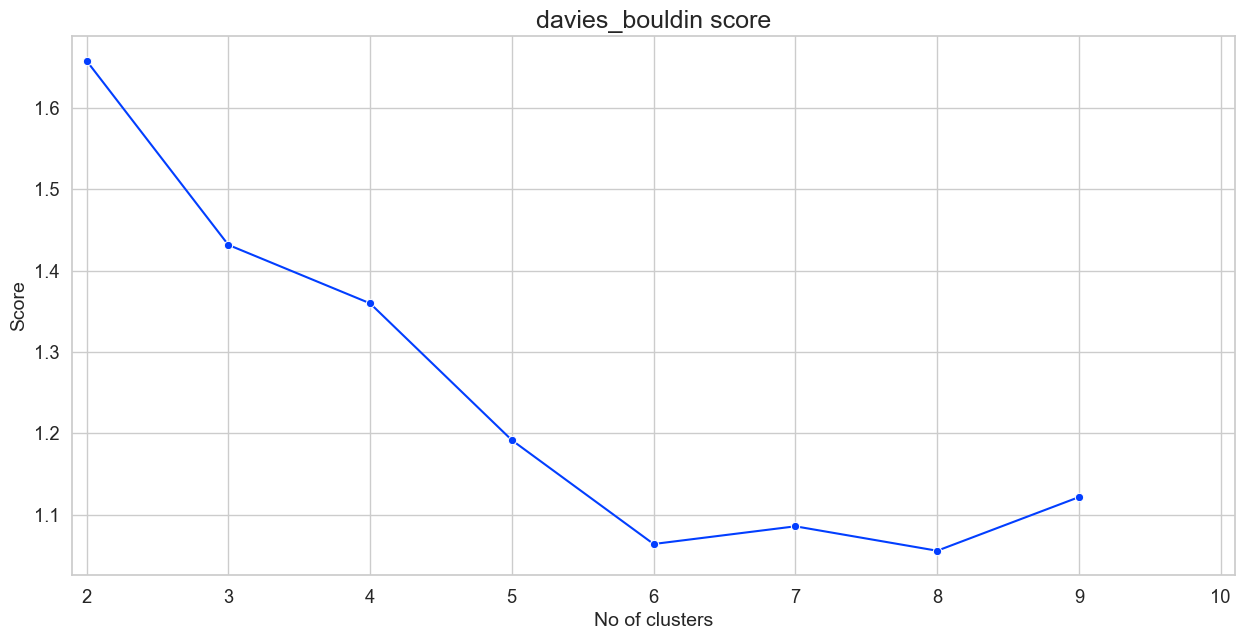

In [7]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
ideal_model=Hiearchical_clustering(model,10,scaled_data)

In [8]:
model =AgglomerativeClustering(linkage='ward',compute_full_tree=True)
model.set_params(n_clusters=4)

clusters=model.fit_predict(scaled_data)
# Add the cluster number to the original scaled data
X_clustered = pd.DataFrame(scaled_data, index=df1.index, columns=df1.columns)
X_clustered["cluster"] = clusters
means =  X_clustered.groupby(by="cluster").mean()
best_centroids=means.reset_index().drop(['cluster'],axis=1)

                    ****************************                      
            Visualization of Boxplot               


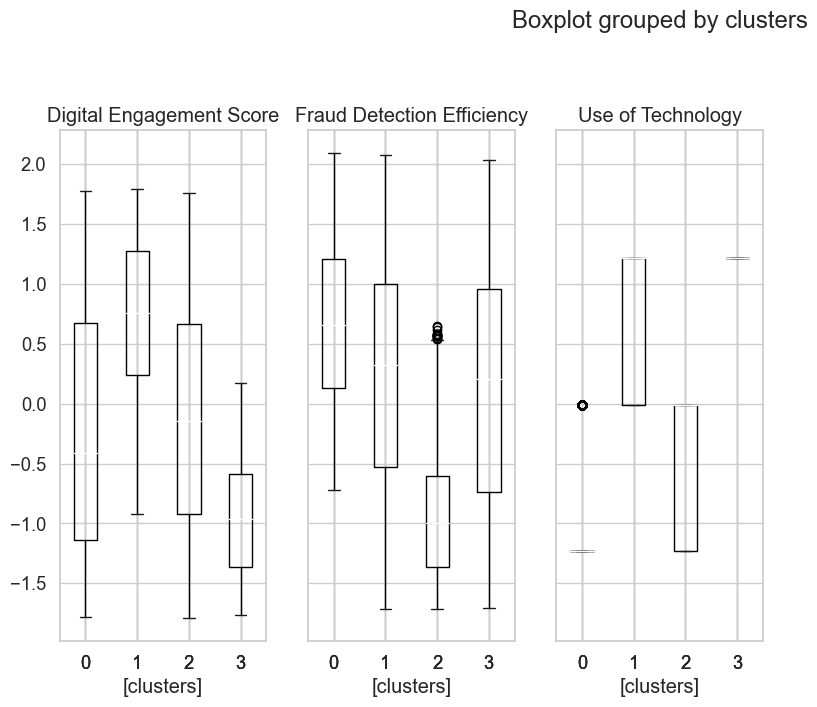

                    ****************************                      
            Visualization of Violin               


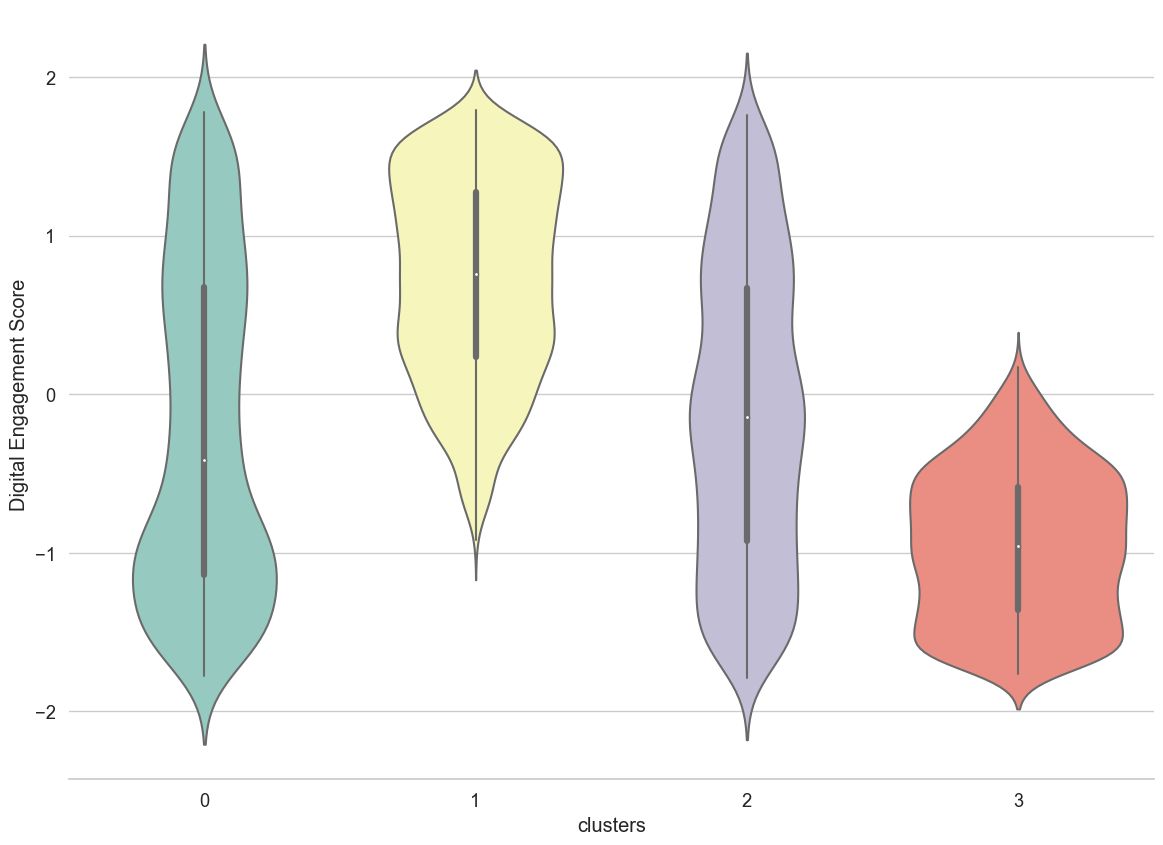

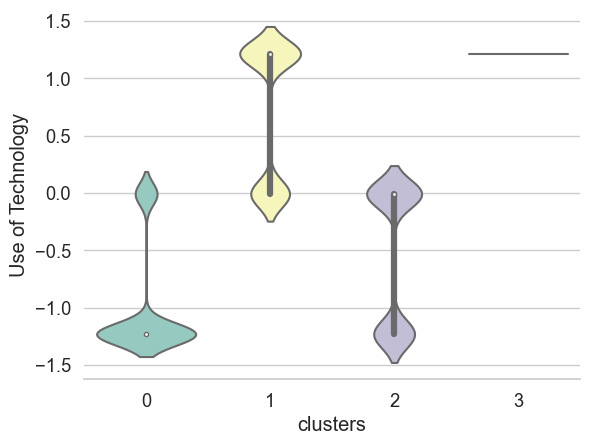

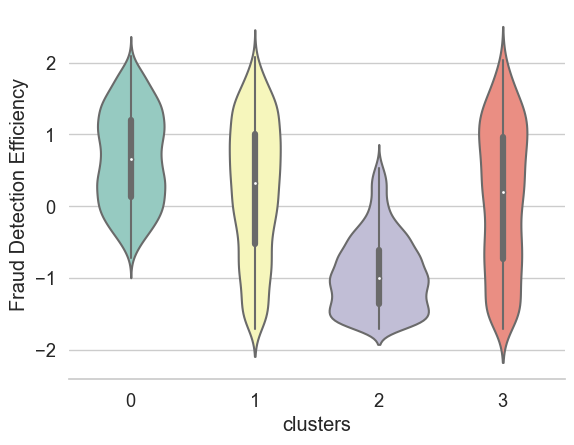

            Visualization of Coordination Chart               


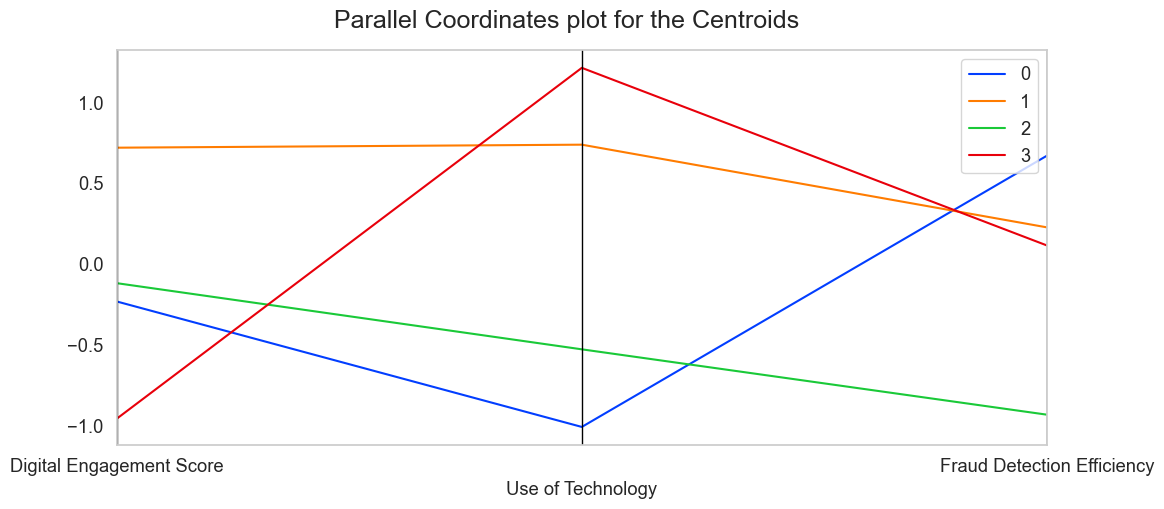

In [9]:
Visualization_results(scaled_data,df1,best_centroids,clusters,pca_v=False)

## Observations from the boxplot chart:

   * Cluster 1 has the highest mean Digital Engagement Score, followed closely by Clusters 0 and 2, which exhibit more variance in their scores.
   * Cluster 3 has the lowest mean Digital Engagement Score among the clusters.
   * Cluster 0 has the highest mean Fraud Detection Efficiency with low variance, followed by Clusters 1 and 3, which have higher variance within them.
   * Cluster 2 has the lowest mean Fraud Detection Efficiency among the clusters.
   * Cluster 0 has the lowest use of technology, followed by Clusters 1 and 2, while Cluster 3 exhibits the highest use of technology among the clusters.

## Observations from the coordination plot:

   * Cluster 3 scores the lowest, while Cluster 1 scores the highest in Digital Engagement Score.
   * Clusters 0 and 2 are positioned between Cluster 1 and Cluster 3, with similar scores and minimal variance between them.
   * Cluster 3 exhibits the highest use of technology, while Clusters 0 and 2 have the lowest scores.
   * Clusters 1 and 2 are positioned between Cluster 3 and Cluster 0, with some variance between them.
   * Cluster 2 has the lowest Fraud Detection Efficiency, while the other clusters have similar scores with minimal variance.


In [10]:
scaler = StandardScaler()
scaled_data =scaler.fit_transform(df1)

Cluster : 2  In process....
Cluster : 3  In process....
Cluster : 4  In process....
Cluster : 5  In process....
Cluster : 6  In process....


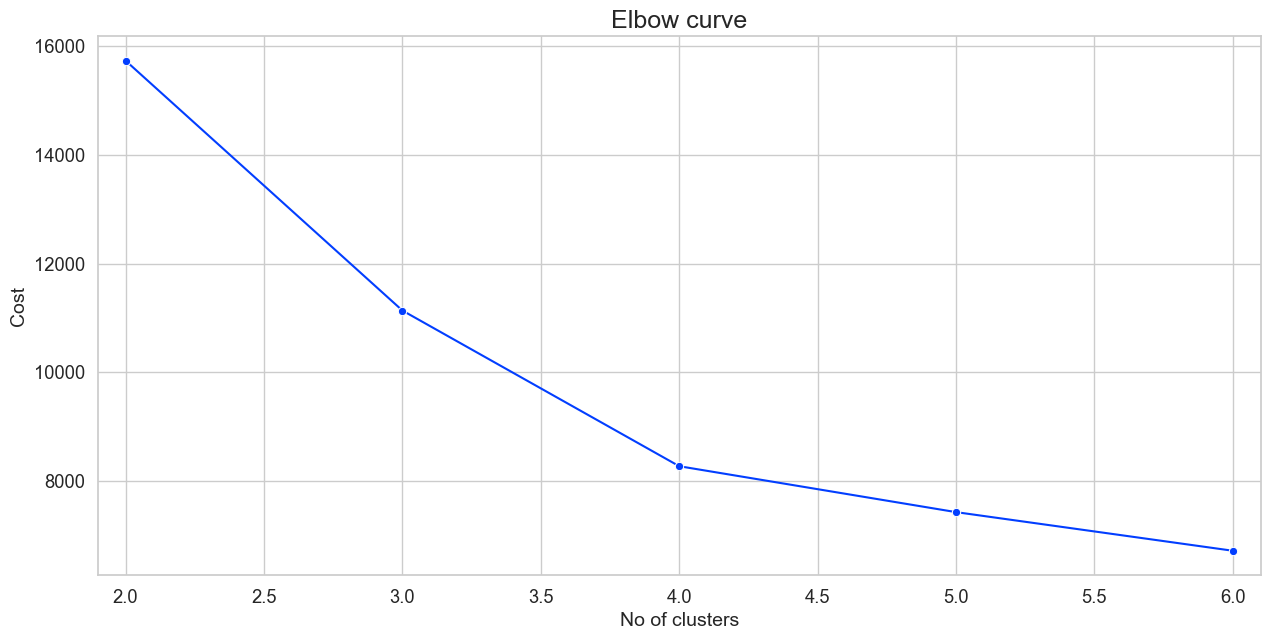

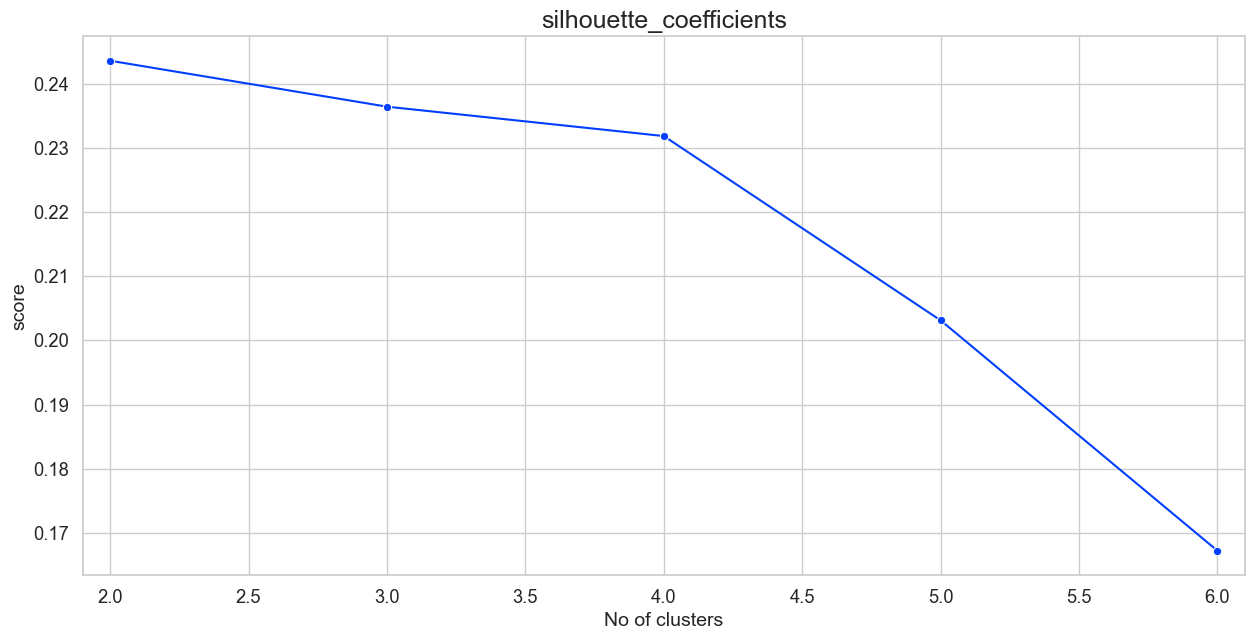

In [11]:
KPrototypes_clustering(2,6,scaled_data,[1])

In [7]:
test_model = KPrototypes(n_clusters=4, init='Huang', random_state=42,verbose=1)
clusters=test_model.fit_predict(scaled_data, categorical=[1])
best_centroids=test_model.cluster_centroids_

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2101, ncost: 8414.374501056378
Run: 1, iteration: 2/100, moves: 721, ncost: 8318.628885385791
Run: 1, iteration: 3/100, moves: 244, ncost: 8304.436711005192
Run: 1, iteration: 4/100, moves: 104, ncost: 8301.582548452476
Run: 1, iteration: 5/100, moves: 43, ncost: 8300.940483836423
Run: 1, iteration: 6/100, moves: 8, ncost: 8300.911201008601
Run: 1, iteration: 7/100, moves: 0, ncost: 8300.911201008601
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1555, ncost: 9056.96228652172
Run: 2, iteration: 2/100, moves: 1200, ncost: 8594.874072669802
Run: 2, iteration: 3/100, moves: 806, ncost: 8415.664434176826
Run: 2, iteration: 4/100, moves: 502, ncost: 8352.309222333555
Run: 2, iteration: 5/100, moves: 291, ncost: 8332.7758518646
Run: 2, iteration: 6/100, moves: 117, ncost: 8329.19889785937
Run: 2, iteration: 7/100, m

                    ****************************                      
            Visualization of Boxplot               


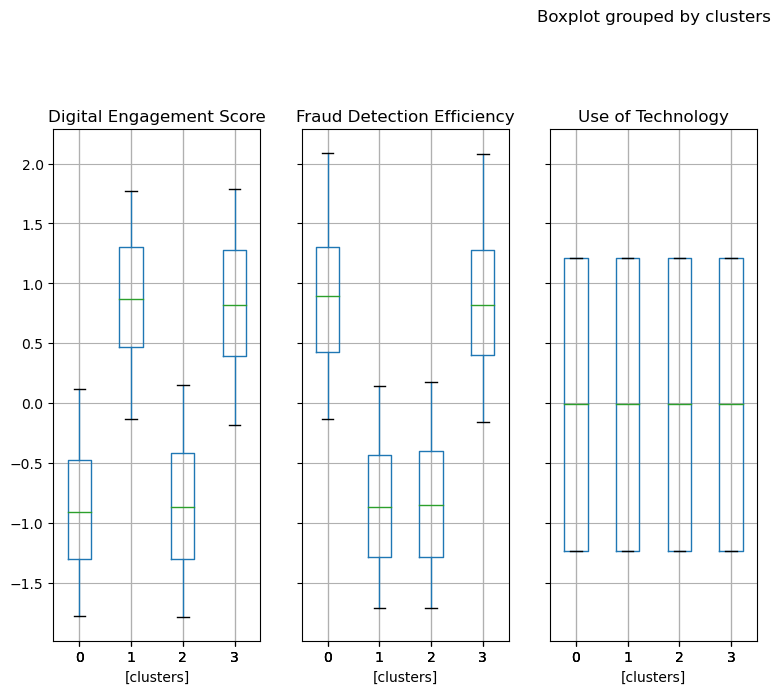

                    ****************************                      
            Visualization of Violin               


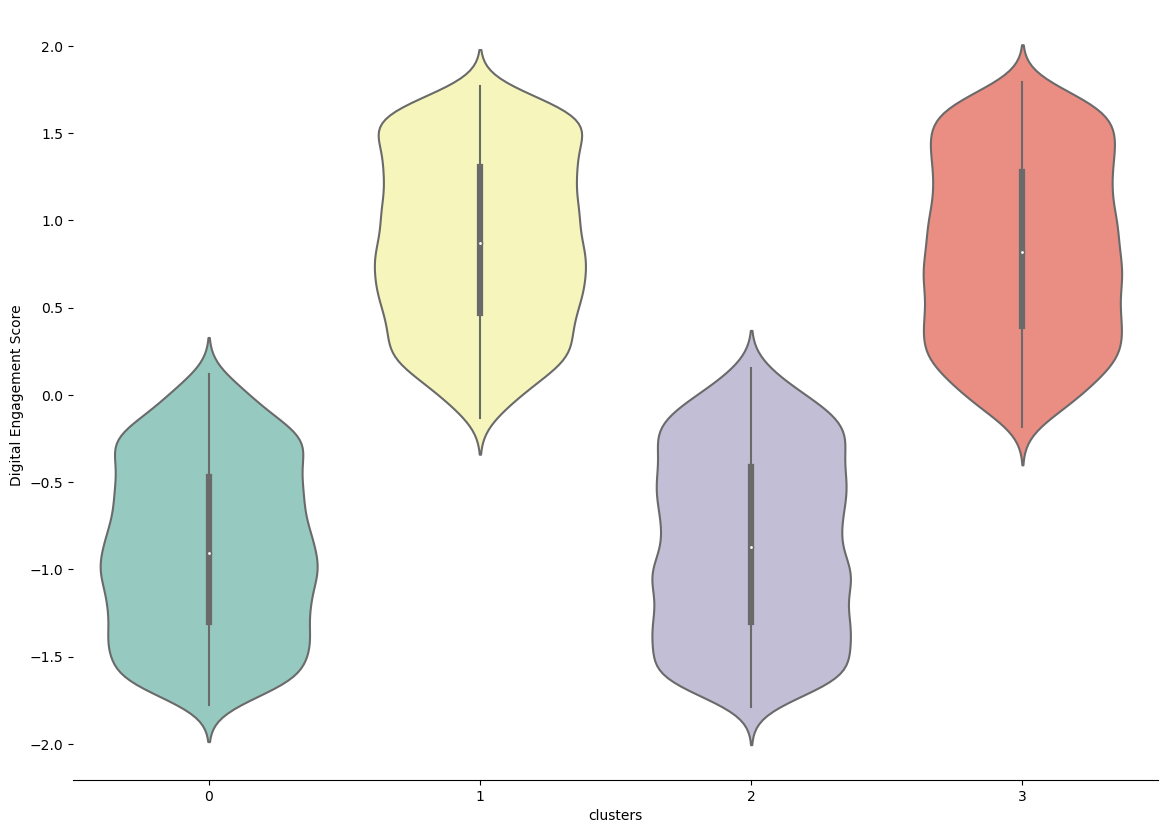

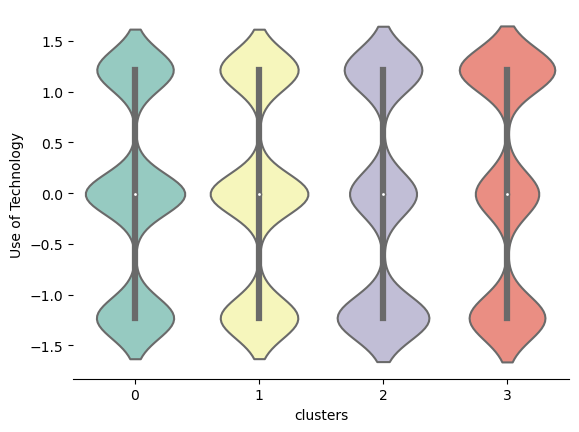

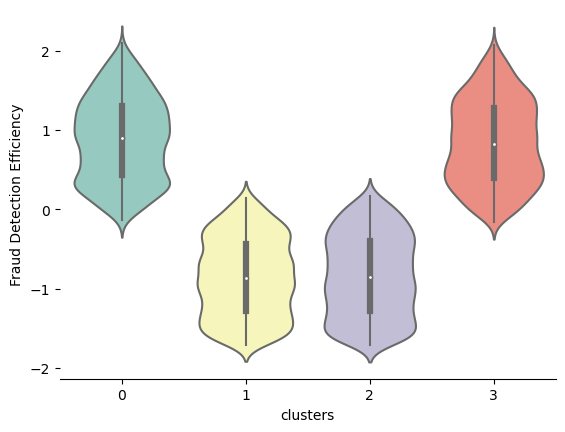

            Visualization of Coordination Chart               


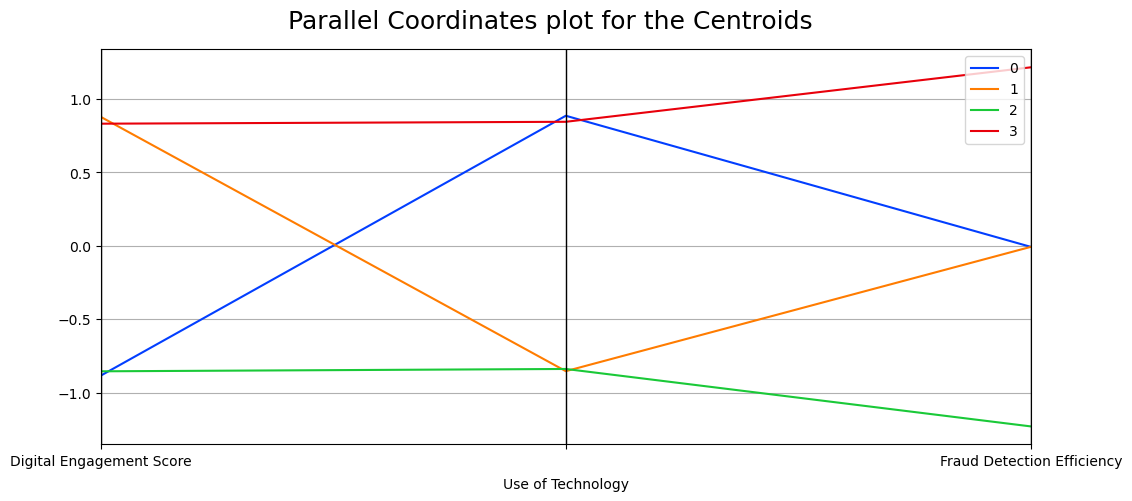

In [8]:
Visualization_results(scaled_data,df1,best_centroids,clusters,pca_v=False)

## Observations from the boxplot chart:

   * Cluster 1 has the highest mean Digital Engagement Score, closely followed by Cluster 3.
   * There's a notable difference between the means of Clusters 0 and 2, which are lower than Clusters 1 and 3.
   * Clusters 0 and 3 have the highest mean Fraud Detection Efficiency.
   * Clusters 1 and 2 exhibit lower mean Fraud Detection Efficiency compared to Clusters 0 and 3.
   * The interpretation of the Use of Technology boxplot is challenging due to the difficulty in distinguishing between the clusters based on this feature.

## Observations from the coordination plot:

   * Cluster 3 has the highest centroid for Digital Engagement Score and Use of Technoogie among all clusters.
   * Cluster 1 has a higher centroid than Cluster 0 for Digital Engagement Score.
   * Cluster 0 has a higher centroid than Cluster 1 for Use of Technology.
   * Cluster 2 has the lowest centroid among all clusters for Use of Technology.
   * Cluster 3 has the highest centroid for Fraud Detection Efficiency among all clusters.
   * Cluster 0 has a similar centroid to Cluster 1 for Fraud Detection Efficiency.

## Comparative Analysis of Clustering Methods

   * After careful consideration and comparison between the clustering results, we have decided to choose the K-Prototypes clustering with 4 clusters. This decision is based on several factors, including a moderate silhouette score, alignment with our business requirements and initial proposals, and the observed order and coherence within the clusters, which are essential for our recommendation system. The K-Prototypes clustering method provides a clearer segmentation of the data, allowing for more actionable insights and informed decision-making. Therefore, we will proceed with the clustering results from the K-Prototypes method for further analysis and implementation in our recommendation system."

## Cluster Interpretation :

### Cluster 0:

   * Use of Technology: Cluster 0 is better at using technology compared to Cluster 1. This means they're likely more efficient in their operations and might offer better digital services to customers.
   * Fraud Detection Efficiency: Cluster 0 is as good as Cluster 1 in detecting fraud. This suggests they have effective measures in place to protect against fraudulent activities.
   * Digital Engagement Score: Cluster 0 isn't as good as Cluster 1 and Cluster 3 in engaging customers digitally. This might mean they're missing out on opportunities to connect with customers online.

### Cluster 1:

   * Digital Engagement Score: Cluster 1 is better than Cluster 0 in engaging customers online. This suggests they're more active and successful in connecting with customers through digital channels.
   * Use of Technology: Cluster 1 isn't as good as Cluster 0 in using technology. This might mean they're missing out on opportunities for efficiency and innovation by not fully utilizing available technologies.

### Cluster 2 :

   * Fraud Detection Efficiency: While not the best, Cluster 2 still has measures in place to detect fraud, even though they might not be as effective as Cluster 0 and Cluster 3.
   * Use of Technology: Cluster 2 is the worst among all clusters in using technology. This could mean they're falling behind in adopting modern tools and processes, which could affect their competitiveness.

### Cluster 3 :

   * Digital Engagement Score: Cluster 3 is the best at engaging customers digitally. This suggests they're effectively leveraging digital channels to connect with customers and build relationships.
   * Use of Technology: Cluster 3 is the best at using technology among all clusters. This means they're likely more efficient and innovative in their operations.
   * Fraud Detection Efficiency: Even though Cluster 3 is the best among all clusters, they might still face challenges in effectively detecting and preventing fraudulent activities.

### Reordering  clusters 

In [10]:
df1['Comfort_score']=clusters
Comfort_mapping={3:3,0:2,1:1,2:0}
df1['Comfort_score']=df1['Comfort_score'].map(Comfort_mapping)
df1.to_csv('features_engineerd/Comfort_Score.csv',index=False)